<a href="https://colab.research.google.com/github/almirarana31/datasciencefinal/blob/main/tiktok_researchquestion_3and4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TikTok

In [ ]:
import pandas as pd

df = pd.read_csv('final_tiktok_cleaned.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video Link          613 non-null    object 
 1   Description         613 non-null    object 
 2   Likes               613 non-null    float64
 3   Comments            613 non-null    float64
 4   Shares              613 non-null    float64
 5   Upload Date         613 non-null    object 
 6   Sentiment           613 non-null    object 
 7   Duration (seconds)  613 non-null    float64
 8   User Followers      613 non-null    float64
 9   Nouns               613 non-null    object 
dtypes: float64(5), object(5)
memory usage: 48.0+ KB
None


In [ ]:
import pandas as pd
import numpy as np
## rq 3

df['Comments'] = df['Comments'].replace(0, 1)
df['Shares'] = df['Shares'].replace(0, 1)

df['like_to_comment_ratio'] = df['Likes'] / df['Comments']

df['like_to_share_ratio'] = df['Likes'] / df['Shares']

conditions = [
    (df['like_to_comment_ratio'] > df['like_to_share_ratio']),
    (df['like_to_comment_ratio'] <= df['like_to_share_ratio'])
]

choices = ['Active', 'Passive']
df['engagement_type'] = np.select(conditions, choices, default='Neutral')

engagement_summary = df[['like_to_comment_ratio', 'like_to_share_ratio', 'engagement_type']]
print(engagement_summary.head())

   like_to_comment_ratio  like_to_share_ratio engagement_type
0              83.670295            98.354662         Passive
1              63.970588            33.819242          Active
2             420.800000            77.925926          Active
3             128.318584            18.471338          Active
4              69.945355            38.095238          Active


In [ ]:
#rq 4

df['Upload Date'] = pd.to_datetime(df['Upload Date'])

df['Upload Date'] = pd.to_datetime(df['Upload Date']).dt.tz_localize(None)
df['days_live'] = (pd.Timestamp.now() - df['Upload Date']).dt.days

df['User Followers'] = df['User Followers'].replace(0, 1)
df['days_live'] = df['days_live'].replace(0, 1)

df['engagement_rate'] = ((df['Comments'] + df['Shares'] + df['Likes']) / df['User Followers']) * (100 / df['days_live'])


In [ ]:
df['shareability'] = df['Shares'] / df['Likes']
print(df[['engagement_rate', 'shareability']].head())

   engagement_rate  shareability
0         1.406538      0.010167
1         1.202811      0.029569
2         0.000661      0.012833
3         0.348395      0.054138
4         0.310520      0.026250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Video Link             613 non-null    object        
 1   Description            613 non-null    object        
 2   Likes                  613 non-null    float64       
 3   Comments               613 non-null    float64       
 4   Shares                 613 non-null    float64       
 5   Upload Date            613 non-null    datetime64[ns]
 6   Sentiment              613 non-null    object        
 7   Duration (seconds)     613 non-null    float64       
 8   User Followers         613 non-null    float64       
 9   Nouns                  613 non-null    object        
 10  like_to_comment_ratio  613 non-null    float64       
 11  like_to_share_ratio    613 non-null    float64       
 12  engagement_type        613 non-null    object        
 13  days_

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df['Upload Date'] = pd.to_datetime(df['Upload Date'])
df['days_live'] = (datetime.now() - df['Upload Date']).dt.days

df = df.fillna(0)

sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_encoded'] = df['Sentiment'].map(sentiment_mapping)

df['nouns_count'] = df['Nouns'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

df['hashtags_count'] = df['Description'].apply(lambda x: x.count('#'))

X = df[['sentiment_encoded', 'User Followers', 'days_live', 'Duration (seconds)', 'nouns_count', 'hashtags_count']]
y = df['engagement_rate']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(importances.sort_values(by='Importance', ascending=False))



Mean Squared Error: 4720.409618627447
R-squared: -0.7549899316087298
              Feature  Importance
1      User Followers    0.853390
5      hashtags_count    0.048972
2           days_live    0.037203
3  Duration (seconds)    0.028829
4         nouns_count    0.019859
0   sentiment_encoded    0.011747


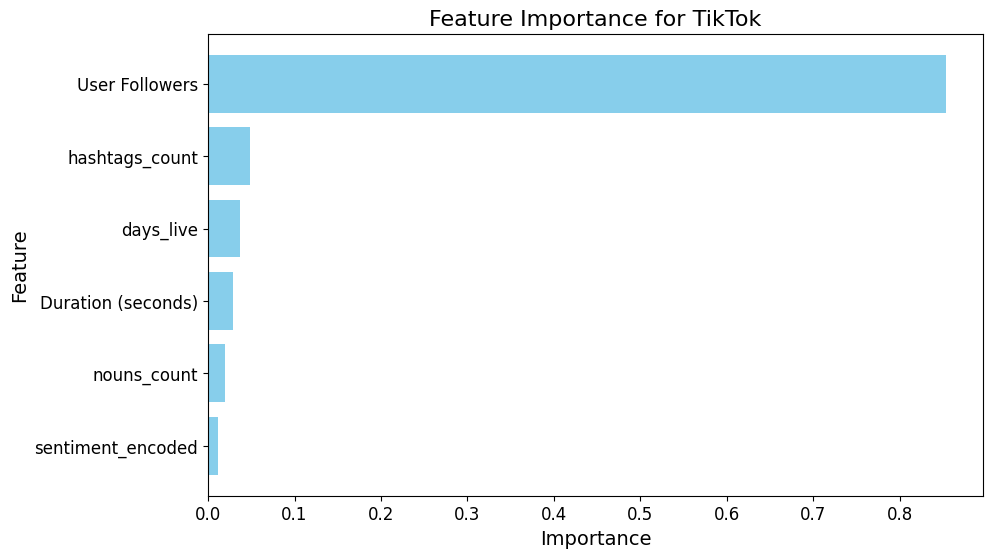

In [ ]:
importances = pd.DataFrame({
    'Feature': ['sentiment_encoded', 'User Followers', 'days_live', 'Duration (seconds)', 'nouns_count', 'hashtags_count'],
    'Importance': [0.011747, 0.853390, 0.037203, 0.028829, 0.019859, 0.048972]
})

importances_sorted = importances.sort_values(by='Importance', ascending=False)

sorted_labels = importances_sorted['Feature']
sorted_importances = importances_sorted['Importance']

plt.figure(figsize=(10, 6))
plt.barh(sorted_labels, sorted_importances, color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance for TikTok', fontsize=16)
plt.gca().invert_yaxis()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()


Twitter

In [ ]:
import pandas as pd
twitter = pd.read_csv('twitter_cleaned (1).csv')
twitter

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,word_count,char_count,hour,day_of_week,sentiment_numeric,"Topic 1: health, mental, https, people, care, wellness, issues, crisis, children, support","Topic 2: health, mental, https, 10, day, people, need, help, just, issues","Topic 3: health, mental, people, like, https, amp, women, don, men, issues","Topic 4: health, mental, year, new, 2022, happy, better, amp, good, https","Topic 5: health, mental, 2023, https, good, year, better, time, don, hope"
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,NaN,NaN,en,NaN,0,...,13,74,23,6,0,0.034362,0.034411,0.033706,0.863781,0.033739
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,NaN,NaN,en,"Sialkot, Pakistan",0,...,8,52,23,6,0,0.068354,0.726807,0.068148,0.068276,0.068415
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,NaN,NaN,en,You're not allowed until...,0,...,6,57,23,6,0,0.040527,0.836438,0.040809,0.041701,0.040525
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,NaN,Gelvetication,en,NaN,0,...,32,301,23,6,1,0.554711,0.010135,0.414882,0.010163,0.010108
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,NaN,ask_aubry,en,"Toronto, Ontario",0,...,45,233,23,6,-1,0.012618,0.012721,0.949126,0.012788,0.012747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,NaN,NaN,en,"Toronto, Ontario",0,...,53,295,21,3,-1,0.010073,0.959389,0.010350,0.010093,0.010096
2844,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,NaN,NaN,en,"Iowa City, IA",0,...,22,125,21,3,1,0.015936,0.015747,0.937017,0.015486,0.015814
2845,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,NaN,en,Enjoying life,0,...,53,306,21,3,1,0.477282,0.088764,0.009193,0.415556,0.009205
2846,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,NaN,en,"Grand Rapids, MI",0,...,42,300,21,3,-1,0.010467,0.010154,0.010126,0.010145,0.959109


In [ ]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 28 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   conversation_id_str                                                                        2848 non-null   int64  
 1   created_at                                                                                 2848 non-null   object 
 2   favorite_count                                                                             2848 non-null   int64  
 3   full_text                                                                                  2848 non-null   object 
 4   id_str                                                                                     2848 non-null   int64  
 5   image_url                                       

In [ ]:
import numpy as np

# rq3
twitter['reply_count'] = twitter['reply_count'].replace(0, 1)
twitter['retweet_count'] = twitter['retweet_count'].replace(0, 1)

twitter['like_to_comment_ratio'] = twitter['favorite_count'] / twitter['reply_count']
twitter['like_to_share_ratio'] = twitter['favorite_count'] / twitter['retweet_count']

conditions = [
    (twitter['like_to_comment_ratio'] > twitter['like_to_share_ratio']),
    (twitter['like_to_comment_ratio'] <= twitter['like_to_share_ratio'])
]

choices = ['Active', 'Passive']
twitter['engagement_type'] = np.select(conditions, choices, default='Neutral')

engagement_summary = twitter[['like_to_comment_ratio', 'like_to_share_ratio', 'engagement_type']]
print("Engagement Summary:")
print(engagement_summary.head())

Engagement Summary:
   like_to_comment_ratio  like_to_share_ratio engagement_type
0                    0.0                  0.0         Passive
1                    1.0                  2.0         Passive
2                    3.0                  3.0         Passive
3                   13.0                 13.0         Passive
4                    5.0                  5.0         Passive


In [ ]:
import datetime

#rq4
twitter['created_at'] = pd.to_datetime(twitter['created_at']).dt.tz_localize(None)
twitter['days_live'] = (pd.Timestamp.now() - twitter['created_at']).dt.days

twitter['days_live'] = twitter['days_live'].replace(0, 1)
twitter['engagement_rate'] = ((twitter['reply_count'] + twitter['retweet_count'] + twitter['favorite_count']) /
                              twitter['days_live'])

twitter['shareability'] = twitter['retweet_count'] / twitter['favorite_count']
print("Data with Engagement Rate and Shareability:")
print(twitter[['engagement_rate', 'shareability']].head())

<ipython-input-22-8aa04fa9817e>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  twitter['created_at'] = pd.to_datetime(twitter['created_at']).dt.tz_localize(None)


Data with Engagement Rate and Shareability:
   engagement_rate  shareability
0         0.006920           inf
1         0.017301      0.500000
2         0.017301      0.333333
3         0.051903      0.076923
4         0.024221      0.200000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

twitter['sentiment_encoded'] = twitter['sentiment_numeric']

X = twitter[['sentiment_encoded', 'reply_count', 'retweet_count', 'favorite_count', 'word_count', 'char_count']]
y = twitter['engagement_rate']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

importances = pd.DataFrame({'Feature': ['sentiment_encoded', 'reply_count', 'retweet_count', 'favorite_count', 'word_count', 'char_count'],
                            'Importance': model.feature_importances_})
print("Feature Importances:")
print(importances.sort_values(by='Importance', ascending=True))

importances_sorted = importances.sort_values(by='Importance', ascending=False)

sorted_labels = importances_sorted['Feature']
sorted_importances = importances_sorted['Importance']

Mean Squared Error: 0.011587408840641605
R-squared: 0.2909838490149086
Feature Importances:
             Feature  Importance
0  sentiment_encoded    0.008523
4         word_count    0.024996
5         char_count    0.033110
2      retweet_count    0.039618
1        reply_count    0.090577
3     favorite_count    0.803175


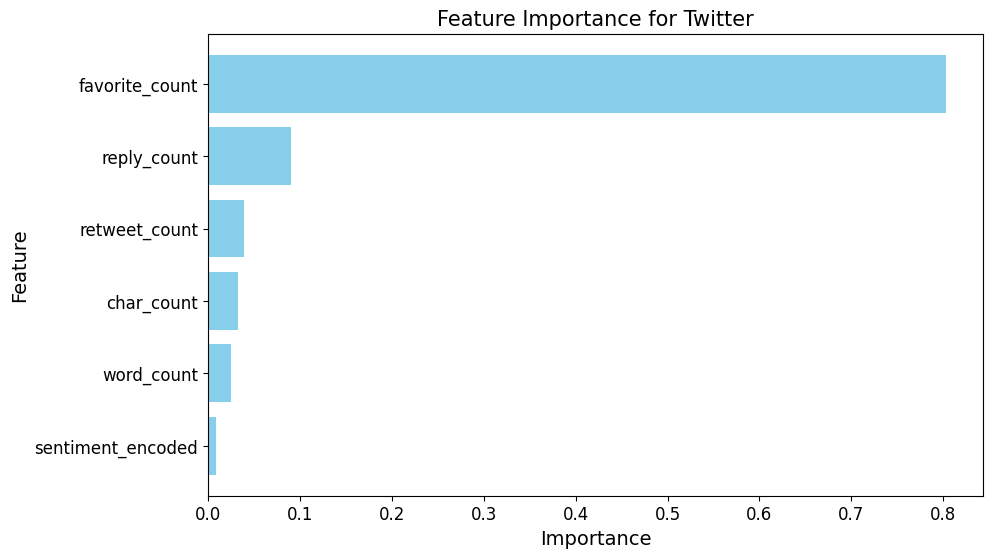

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importances_sorted['Feature'], importances_sorted['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance for Twitter', fontsize=15)
plt.gca().invert_yaxis()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()